# cv2 기본 사용법: 이미지 처리와 필터링

1. **이미지 읽기 및 표시**
   - 그레이스케일 이미지와 컬러 이미지의 읽기, 변환, 표시 방법.
<br></br>
   
2. **픽셀 강도 조작**
   - 특정 이미지 영역의 픽셀 값을 조작하여 이미지 변형.
<br></br>
   
3. **컨볼루션 필터**
   - 흐림(Blurring), 윤곽선 감지(Laplacian), 샤프닝(Sharpening), 경계선 감지(Sobel) 등 다양한 필터 사용법.
<br></br>
   
4. **Matplotlib를 통한 시각화**
   - OpenCV와 Matplotlib을 결합해 결과를 시각적으로 확인하는 방법.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
cv2.__version__

'4.11.0'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
!unzip images.zip -d /content/

Archive:  images.zip
replace /content/images/aeroplane.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/images/aeroplane.jpg  
replace /content/images/apple.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/images/apple.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/images/apple.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/images/apple.png  
replace /content/images/baboon.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/images/baboon.png  
replace /content/images/banana.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/images/banana.jpg  
replace /content/images/barbara.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/images/barbara.png  
replace /content/images/bird.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/images/bird.jpg  
replace /content/images/black-background.jpg? [y]es, [n]o, [A

### OpenCV `cv2.imread()` 옵션

| 옵션                        | 값   | 설명                                    |
|-----------------------------|-------|----------------------------------------|
| `cv2.IMREAD_COLOR`          | `1`   | 컬러 이미지 (기본값)                   |
| `cv2.IMREAD_GRAYSCALE`      | `0`   | 흑백 이미지                             |
| `cv2.IMREAD_UNCHANGED`      | `-1`  | 원본 데이터 그대로 읽기                 |
| `cv2.IMREAD_ANYCOLOR`       |       | 가능한 경우 컬러로 읽기                 |
| `cv2.IMREAD_ANYDEPTH`       |       | 원본 비트(8/16/32) 깊이로 읽기          |
| `cv2.IMREAD_REDUCED_COLOR_2`|       | 컬러 이미지, 원본의 1/2 크기           |
| `cv2.IMREAD_REDUCED_COLOR_4`|       | 컬러 이미지, 원본의 1/4 크기           |
| `cv2.IMREAD_REDUCED_COLOR_8`|       | 컬러 이미지, 원본의 1/8 크기           |
| `cv2.IMREAD_REDUCED_GRAYSCALE_2` |   | 흑백 이미지, 원본의 1/2 크기           |
| `cv2.IMREAD_REDUCED_GRAYSCALE_4` |   | 흑백 이미지, 원본의 1/4 크기           |
| `cv2.IMREAD_REDUCED_GRAYSCALE_8` |   | 흑백 이미지, 원본의 1/8 크기           |

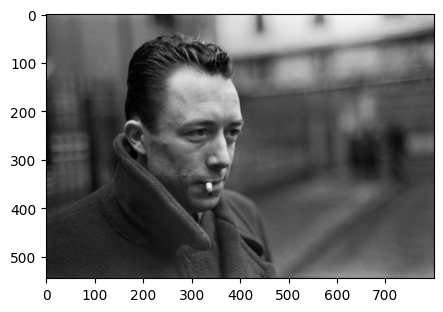

In [ ]:
# 이미지 파일을 흑백(그레이스케일) 모드로 읽어들임
# cv2.IMREAD_GRAYSCALE 옵션은 0과 동일하며, 이미지를 흑백으로 읽습니다.
image = cv2.imread("/content/images/camus.jpg", 0)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.show()
#image = cv2.imread('images/camus.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# 흑백 이미지의 픽셀 값의 최소값과 최대값을 출력
# 흑백 이미지에서는 픽셀 값이 0(검정)에서 255(흰색) 사이의 값을 가집니다.
print(image.shape)
print(np.min(image), np.max(image))

(545, 800)
0 252


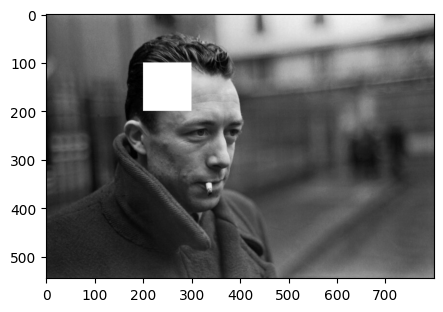

In [ ]:
# 이미지 배열의 특정 영역(100행~200행, 200열~300열)을 흰색(255)으로 변경
# 흑백 이미지에서 픽셀 값이 255이면 완전한 흰색을 의미
image[100:200, 200:300] = 255

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.show()

array([[[  4,  20,  49],
        [  5,  21,  50],
        [  7,  21,  50],
        ...,
        [  4,  22,  93],
        [  4,  22,  93],
        [  4,  22,  93]],

       [[  4,  20,  49],
        [  5,  21,  50],
        [  7,  21,  50],
        ...,
        [  3,  20,  93],
        [  3,  21,  92],
        [  3,  21,  92]],

       [[  4,  20,  49],
        [  5,  21,  50],
        [  4,  20,  49],
        ...,
        [  3,  20,  93],
        [  3,  21,  92],
        [  3,  21,  92]],

       ...,

       [[106, 161, 112],
        [107, 163, 114],
        [107, 166, 115],
        ...,
        [ 60,  59, 103],
        [ 57,  58, 102],
        [ 56,  57, 101]],

       [[111, 161, 113],
        [110, 162, 114],
        [110, 165, 116],
        ...,
        [ 62,  61, 105],
        [ 61,  60, 104],
        [ 61,  60, 104]],

       [[113, 161, 113],
        [113, 163, 115],
        [112, 164, 116],
        ...,
        [ 64,  63, 107],
        [ 63,  62, 106],
        [ 62,  61, 105]]], dtype=uint8)
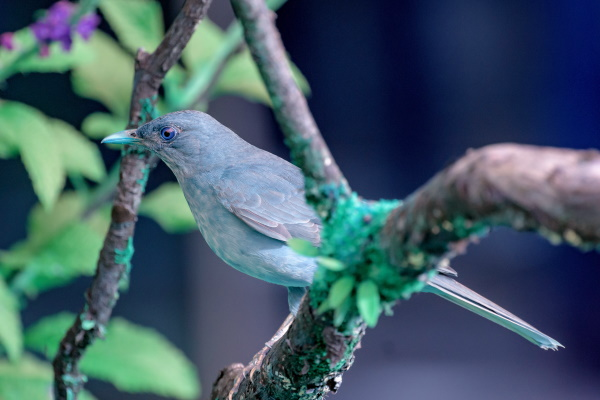

In [ ]:
image = cv2.imread('images/bird.jpg', cv2.IMREAD_COLOR)
image

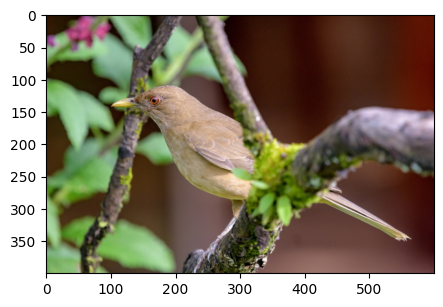

In [ ]:
# 이미지를 컬러 모드로 읽어들임
# cv2.IMREAD_COLOR는 컬러 이미지를 읽기 위한 기본 옵션 (BGR 형식으로 불러옴)
image = cv2.imread('images/bird.jpg', cv2.IMREAD_COLOR)
# image = cv2.imread('images/bird.jpg', 1)

# BGR 형식에서 RGB 형식으로 색상 변환
# OpenCV는 기본적으로 이미지를 BGR(Blue, Green, Red) 순서로 읽어들이지만,
# Matplotlib는 RGB(Red, Green, Blue) 순서를 사용하므로 변환이 필요합니다.
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(new_image)
plt.show()

In [ ]:
print(new_image.shape)
print(np.min(new_image), np.max(new_image))

(400, 600, 3)
0 255


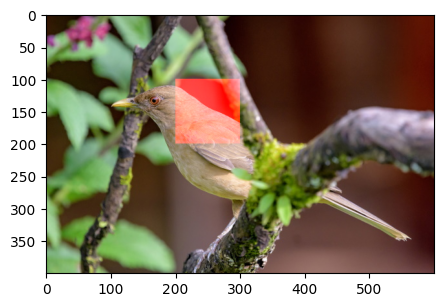

In [ ]:
# 컬러 이미지의 특정 영역(100행~200행, 200열~300열)에 대해 파란색 채널(B 채널) 값을 255로 설정
# OpenCV는 기본적으로 BGR(파랑, 초록, 빨강) 순서로 채널을 사용합니다.
# new_image[100:200, 200:300, 0]: 0번 채널(파란색)을 선택하여 값을 변경
# 255는 해당 채널의 최대값으로, 파란색을 강하게 나타냅니다.

new_image[100:200, 200:300, 0] = 255

plt.figure(figsize=(5, 5))
plt.imshow(new_image, cmap='gray')
plt.show()

##  이미지 샘플링(Sampling)과 양자화(Quantization)

샘플링:  
- 원본 이미지를 읽고 흑백으로 변환.  
- 리샘플링하여 해상도를 낮춘 이미지를 시각화.
<br></br>
양자화:
- 아날로그 또는 연속적인 값을 이산적인 값의 집합으로 변환  
- 비트 수에 따라 픽셀 값을 정규화 및 재배치.  
- 예: 2비트로 양자화 시, 0~255 범위의 값을 다음 단계로 매핑:
```
0~63 → 0
64~127 → 1
128~191 → 2
192~255 → 3
```

In [ ]:
# 이미지 불러오기 (흑백 변환)
image_path = "images/bird.jpg"  # 이미지 경로 입력
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image.shape

(400, 600)

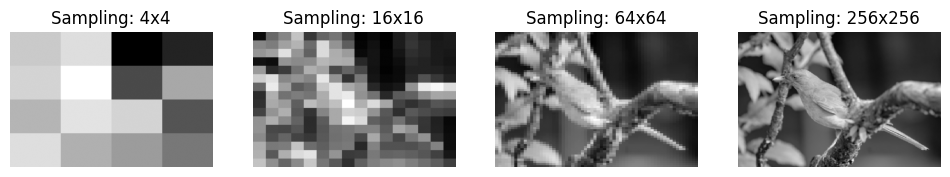

In [ ]:
# 다양한 샘플링 크기
    # 리샘플링 (INTER_AREA는 리사이징 시 적합한 보간 방법)
    # 다시 원본 크기로 확대 (보여주기 위해)
# 다양한 샘플링 크기
sizes = [4, 16, 64,256]

plt.figure(figsize=(12, 4))
for i, size in enumerate(sizes):
    # 리샘플링 (INTER_AREA는 리사이징 시 적합한 보간 방법,cv2.INTER_NEAREST)
    resized_image = cv2.resize(image, (size, size), interpolation=cv2.INTER_AREA)
    # 다시 원본 크기로 확대 (보여주기 위해)
    resized_image = cv2.resize(resized_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    plt.subplot(1, len(sizes), i+1)
    plt.imshow(resized_image, cmap="gray")
    plt.title(f"Sampling: {size}x{size}")
    plt.axis("off")
plt.show()

### 양자화 level에 따른 이미지 픽셀값의 최대/최소값
픽셀 값은 일반적으로 0~255 (8비트, 256단계) 범위를 가지는데, 이를 **더 적은 단계(레벨)** 로 나누어 표현하는 것이 양자화

예) 2 비트 양자화 $\rightarrow 2^{2}=4$ 레벨의 범위: 0,1,2,3 → 4단계 (0~255 범위를 4단계로 나누기)  
각 단계의 크기는 256/4=64 이므로 양자화된 값은 각 레벨에 대해 (레벨 번호 x 64)로 매핑됩니다.  
따라서 양자화 값은:  
레벨 0: 0-63 --> 0 * 64 = 0   
레벨 1: 63-127 --> 1 * 64 = 64     
레벨 2: 128-191 --> 2 * 64 = 128   
레벨 3: 191-255 --> 3 * 64 = 192 로 매핑  

예) 4 비트 양자화 $\rightarrow 2^{4}=16$ (0~255 범위를 16단계로 나누기)

0 192
0 240
0 255


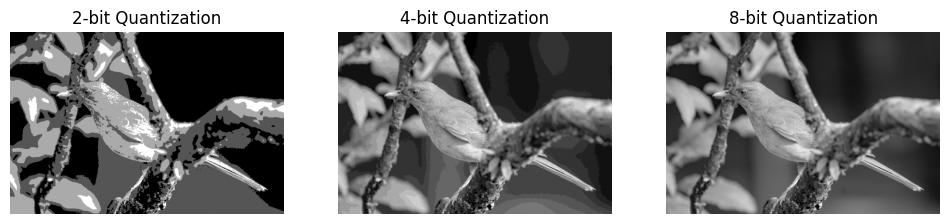

In [ ]:
# 이미지 양자화
def quantize_image(image, bits):
    # 양자화 레벨을 계산 (2^bits)
    levels = 2 ** bits
    # 이미지 픽셀 값을 정규화한 뒤, 양자화 단위에 맞게 변환
    quantized = (image / 256 * levels).astype(np.uint8) * (256 // levels)
    return quantized

# 양자화할 비트 수 정의 (2비트, 4비트, 8비트)
bit_depths = [2, 4, 8]

plt.figure(figsize=(12, 4))  # 플롯 크기 설정
for i, bits in enumerate(bit_depths):
    # 각 비트 수에 따라 양자화 수행
    quantized_image = quantize_image(image, bits)
    # 양자화된 이미지의 최소값과 최대값 출력
    print(quantized_image.min(), quantized_image.max())
    # 양자화된 이미지를 플롯에 추가
    plt.subplot(1, len(bit_depths), i+1)  # 플롯 위치 설정
    plt.imshow(quantized_image, cmap="gray")  # 이미지를 흑백으로 표시
    plt.title(f"{bits}-bit Quantization")  # 제목 설정
    plt.axis("off")  # 축 제거
plt.show()  # 플롯 표시

## Convolution

### Blurring kernel

- cv2.filter2D(new_image, ddepth, kernel)

    - cv2.filter2D() 함수는 이미지를 필터링(컨볼루션)할 때 사용되며, 주어진 커널(kernel)을 이미지에 적용합니다.
    - new_image: 입력 이미지. 필터를 적용할 원본 이미지.
    - ddepth: 출력 이미지의 픽셀 데이터 깊이(destination depth) - 8비트, 16비트, 32비트 등.  
    - kernel: 필터링에 사용할 커널(행렬).

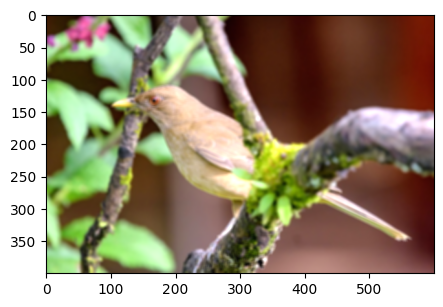

In [ ]:
# 이미지를 컬러 모드로 읽어들임 (BGR 형식으로 불러옴)
image = cv2.imread('images/bird.jpg', cv2.IMREAD_COLOR)

# BGR 형식을 RGB 형식으로 변환
# OpenCV는 기본적으로 이미지를 BGR 형식으로 읽으므로, Matplotlib에서 올바르게 표시하기 위해 RGB로 변환
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 블러링(흐림 효과)을 위한 커널 생성
# np.ones((5, 5)) / 20: 5x5 크기의 모든 요소가 1/20(=0.05)인 커널을 생성
blur_kernel = np.ones((5, 5)) / 20

# 필터링(컨볼루션) 적용하여 이미지에 블러링 효과 추가
# cv2.filter2D(): 주어진 커널을 사용해 필터링을 수행
# -1: 입력 이미지의 비트 깊이(ddepth)를 출력 이미지에 그대로 사용
blur_image = cv2.filter2D(new_image, -1, blur_kernel)  # -1 : destination depth = input depth

plt.figure(figsize=(5, 5))
plt.imshow(blur_image)
plt.show()

### Laplacian kernel
- 윤곽선 표시 - 이미지의 밝기(픽셀 강도)가 급격히 변하는 경계(즉, 윤곽선)를 강조하는 데 유용

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


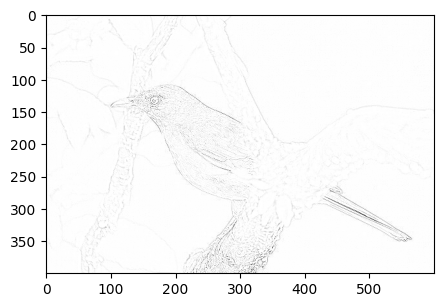

In [ ]:
# 이미지를 컬러 모드로 읽어들임 (BGR 형식으로 불러옴)
image = cv2.imread('images/bird.jpg', cv2.IMREAD_COLOR)

# 이미지를 흑백(그레이스케일)으로 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 라플라시안 커널(Laplacian Kernel) 정의
# 경계선(윤곽선) 검출을 위한 3x3 크기의 필터
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
print(laplacian_kernel)

# 라플라시안 필터 적용
# cv2.filter2D(): 주어진 커널을 사용해 필터링을 수행
# -1: 입력 이미지의 비트 깊이(ddepth)를 출력 이미지에 그대로 사용
result_image = cv2.filter2D(gray_image, -1, laplacian_kernel)

plt.figure(figsize=(5, 5))
plt.imshow(result_image, cmap=plt.cm.binary)
plt.show()

### Sharpen kernel
- 흐릿한 사진을 또렷하게 하는 효과

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


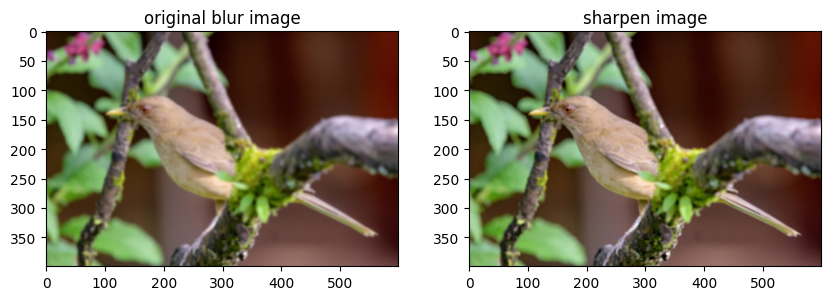

In [ ]:
# 이미지를 컬러 모드로 읽어들임 (BGR 형식으로 불러옴)
original_image = cv2.imread('images/unsharp_bird.jpg', cv2.IMREAD_COLOR)

# OpenCV는 기본적으로 이미지를 BGR 형식으로 읽으므로, Matplotlib에서 올바르게 표시하기 위해 RGB로 변환
new_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# 샤프닝(Sharpening) 커널 정의
# 흐릿한 이미지를 선명하게 만드는 데 사용되는 3x3 크기의 필터
# 중심 값(5)이 주변 값(-1)보다 크므로 중심 픽셀을 강조하여 이미지를 선명하게 만듦
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
print(sharpen_kernel)  # 샤프닝 커널 출력

# 샤프닝 필터 적용
# -1: 입력 이미지의 비트 깊이(ddepth)를 출력 이미지에 그대로 사용
result_image = cv2.filter2D(new_image, -1, sharpen_kernel)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(new_image)
plt.title("original blur image")
plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title("sharpen image")
plt.show()

### Sobel kernel
- 강도 기울기 (intensity gradient) 감지

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


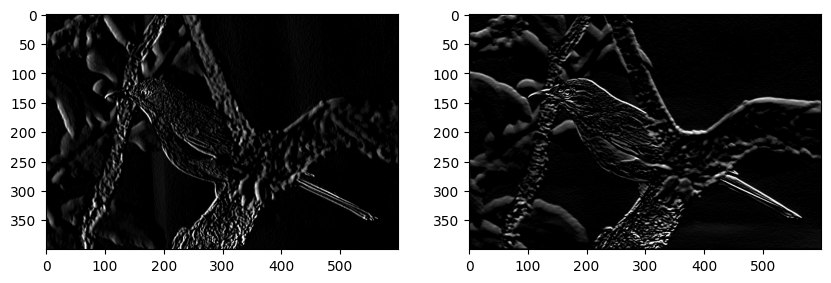

In [ ]:
# 이미지를 컬러 모드로 읽어들임 (BGR 형식으로 불러옴)
original_image = cv2.imread('images/bird.jpg', cv2.IMREAD_COLOR)

# cv2.COLOR_BGR2GRAY: BGR 형식의 이미지를 그레이스케일 형식으로 변환
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Sobel 커널 1 (수평 방향 경계선 감지)
# - 수평 방향(가로)으로 강도 기울기를 계산
# - 양의 값(1, 2, 1)은 오른쪽 방향, 음의 값(-1, -2, -1)은 왼쪽 방향의 경계를 강조
sobel_kernel_1 = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
print(sobel_kernel_1)  # 커널 출력

# Sobel 커널 2 (수직 방향 경계선 감지)
# - 수직 방향(세로)으로 강도 기울기를 계산
# - 양의 값(1, 2, 1)은 아래 방향, 음의 값(-1, -2, -1)은 위 방향의 경계를 강조
sobel_kernel_2 = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])
print(sobel_kernel_2)  # 커널 출력

# Sobel 커널 1을 사용하여 수평 방향 경계선 감지
result_image_1 = cv2.filter2D(gray_image, -1, sobel_kernel_1)

# Sobel 커널 2를 사용하여 수직 방향 경계선 감지
result_image_2 = cv2.filter2D(gray_image, -1, sobel_kernel_2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(result_image_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result_image_2, cmap='gray')
plt.show()